<a href="https://www.kaggle.com/code/laxmivatsalyadaita/gpa-study-hours?scriptVersionId=140365223" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

**If you like my notebook, please don't forget to UPVOTE! You can also make a copy of my notebook and edit to run your additional analysis.**

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/gpa-study-hours/gpa_study_hours.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
data = pd.read_csv('/kaggle/input/gpa-study-hours/gpa_study_hours.csv')
data

,gpa,study_hours
0,4.00,10.0
1,3.80,25.0
2,3.93,45.0
3,3.40,10.0
4,3.20,4.0
...,...,...
188,3.60,24.0
189,3.70,12.0
190,3.84,15.0
191,3.80,10.0


<Axes: xlabel='study_hours', ylabel='gpa'>

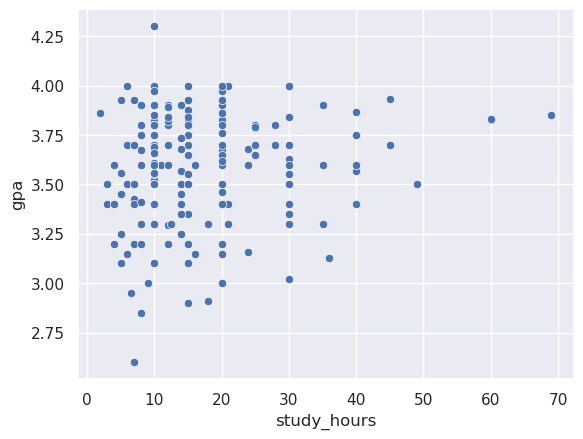

In [4]:
sns.scatterplot(data=data, x=data['study_hours'], y=data['gpa'])

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


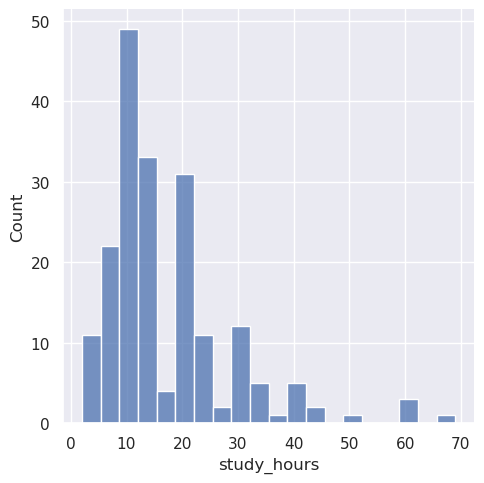

In [5]:
sns.displot(data['study_hours'])

/tmp/ipykernel_20/72808370.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['gpa'])


<Axes: xlabel='gpa', ylabel='Density'>

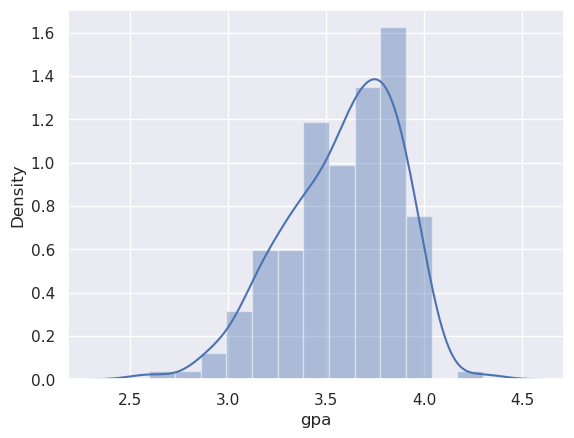

In [6]:
sns.distplot(data['gpa'])

<Axes: xlabel='study_hours'>

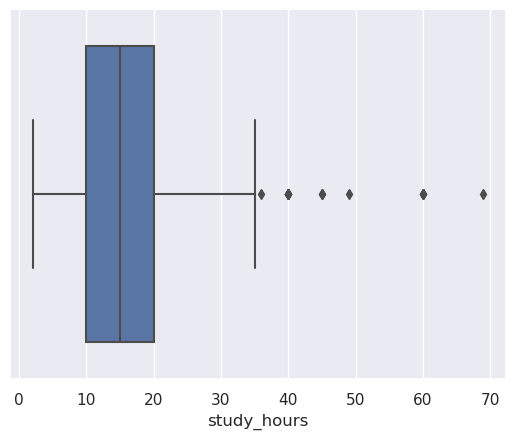

In [7]:
sns.boxplot(data=data, x=data['study_hours'])

In [8]:
data_cleaned = data[data['study_hours']<=35]

<Axes: xlabel='study_hours'>

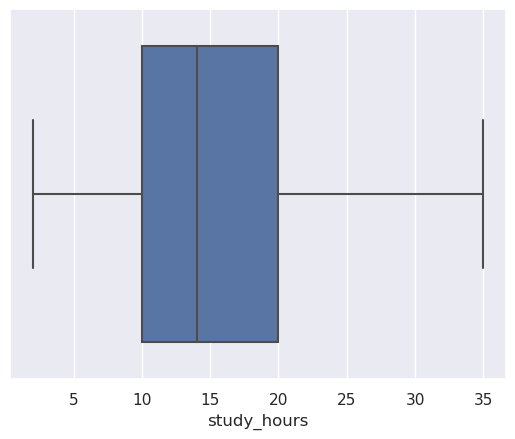

In [9]:
sns.boxplot(data=data_cleaned, x=data_cleaned['study_hours'])

/tmp/ipykernel_20/1662634945.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_cleaned['study_hours'])


<Axes: xlabel='study_hours', ylabel='Density'>

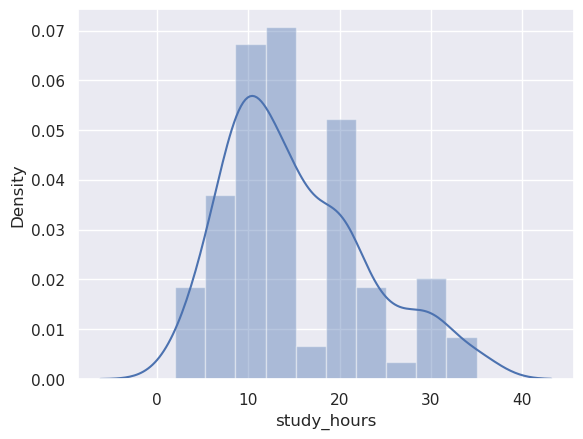

In [10]:
sns.distplot(data_cleaned['study_hours'])

<Axes: xlabel='gpa'>

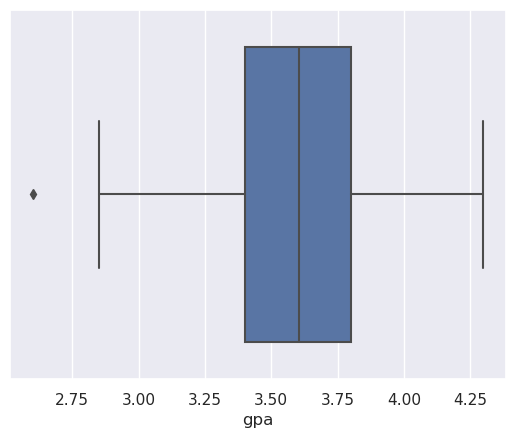

In [11]:
sns.boxplot(data=data_cleaned, x=data_cleaned['gpa'])

In [12]:
data_cleaned = data_cleaned[data_cleaned['gpa']>=2.75]

<Axes: xlabel='study_hours', ylabel='gpa'>

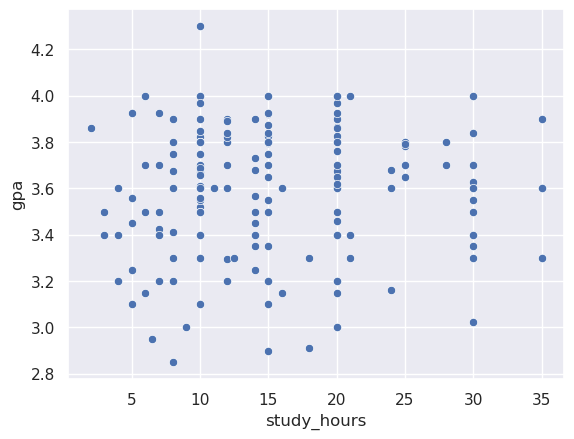

In [13]:
sns.scatterplot(data=data_cleaned, x=data_cleaned['study_hours'], y=data_cleaned['gpa'])

In [14]:
from sklearn.cluster import KMeans

In [15]:
wcss = []
for i in range(1,15):
    kmeans = KMeans(i)
    kmeans.fit(data_cleaned)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

Text(0, 0.5, 'within-cluster sum of squares (wcss)')

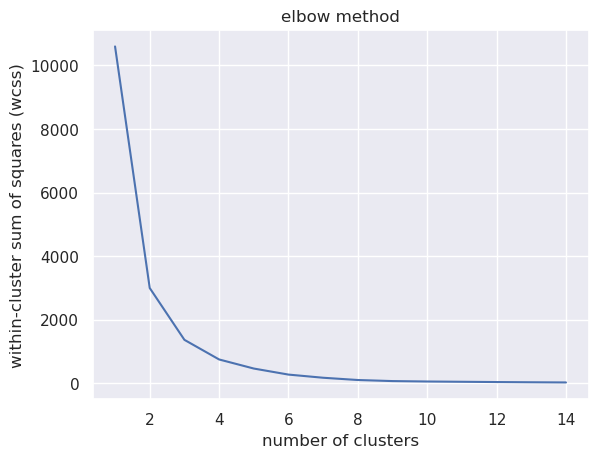

In [16]:
num_clusters = range(1,15)
plt.plot(num_clusters,wcss)
plt.title("elbow method")
plt.xlabel('number of clusters')
plt.ylabel('within-cluster sum of squares (wcss)')

In [17]:
kmeans = KMeans(9)
kmeans.fit(data_cleaned)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=9)

In [18]:
identify_clusters = kmeans.fit_predict(data_cleaned)
identify_clusters

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 7, 1, 6, 1, 7, 1, 1, 4, 5, 3, 1, 1, 5, 0, 5, 4, 2, 8, 5, 0, 1,
       3, 1, 1, 4, 0, 5, 0, 3, 3, 0, 0, 8, 1, 1, 3, 1, 1, 0, 1, 1, 8, 7,
       0, 7, 3, 1, 3, 1, 1, 7, 7, 4, 3, 6, 1, 6, 6, 0, 8, 3, 6, 1, 3, 7,
       3, 1, 3, 5, 3, 5, 5, 1, 1, 0, 0, 5, 1, 6, 5, 3, 1, 0, 1, 1, 2, 1,
       5, 3, 4, 2, 0, 8, 2, 5, 4, 1, 3, 4, 0, 3, 7, 0, 0, 0, 7, 3, 3, 1,
       2, 3, 0, 6, 8, 0, 4, 8, 5, 5, 0, 0, 1, 0, 8, 8, 0, 1, 1, 0, 0, 1,
       4, 3, 0, 3, 3, 6, 6, 5, 5, 3, 3, 0, 3, 3, 7, 4, 0, 4, 0, 5, 5, 0,
       3, 0, 3, 0, 3, 5, 3, 1, 5, 0, 1, 4, 8, 6, 4, 6, 5, 4, 3, 1, 7, 8,
       3, 1, 3], dtype=int32)

In [19]:
data_with_clusters = data_cleaned.copy()
data_with_clusters['Clusters'] = identify_clusters
data_with_clusters

,gpa,study_hours,Clusters
0,4.00,10.0,1
1,3.80,25.0,7
3,3.40,10.0,1
4,3.20,4.0,6
5,3.52,10.0,1
...,...,...,...
188,3.60,24.0,7
189,3.70,12.0,8
190,3.84,15.0,3
191,3.80,10.0,1


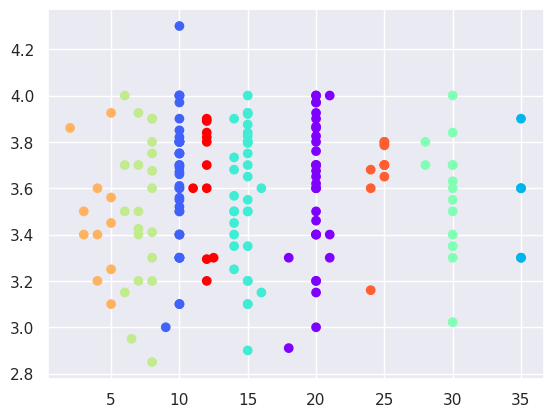

In [20]:
plt.scatter(data_with_clusters['study_hours'],data_with_clusters['gpa'], c=data_with_clusters['Clusters'], cmap='rainbow')
plt.show()

This in not a good approach.

In [21]:
data_cleaned.describe(include='all')

,gpa,study_hours
count,179.000000,179.000000
mean,3.585229,15.318436
std,0.279816,7.709745
min,2.850000,2.000000
25%,3.400000,10.000000
50%,3.610000,14.000000
75%,3.800000,20.000000
max,4.300000,35.000000


In [22]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components = 3)
gmm.fit(data_cleaned)
 


GaussianMixture(n_components=3)

In [23]:
labels = gmm.predict(data_cleaned)
data_cleaned['labels']= labels
d0 = data_cleaned[data_cleaned['labels']== 0]
d1 = data_cleaned[data_cleaned['labels']== 1]
d2 = data_cleaned[data_cleaned['labels']== 2]

In [24]:
d2


,gpa,study_hours,labels
0,4.000,10.0,2
3,3.400,10.0,2
5,3.520,10.0,2
8,3.700,10.0,2
9,3.750,10.0,2
...,...,...,...
181,3.925,5.0,2
184,4.000,6.0,2
189,3.700,12.0,2
191,3.800,10.0,2


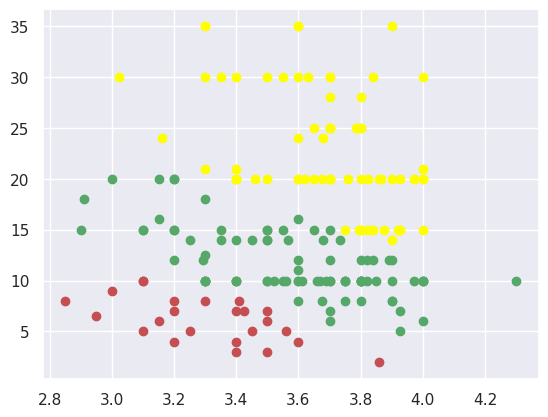

In [25]:
plt.scatter(d0['gpa'], d0['study_hours'], c ='r')
plt.scatter(d1['gpa'], d1['study_hours'], c ='yellow')
plt.scatter(d2['gpa'], d2['study_hours'], c ='g')
plt.show()

In [26]:
print(gmm.lower_bound_)
print(gmm.n_iter_)

-3.479690671932036
11


In [27]:
x1 = data_cleaned['study_hours']
y = data_cleaned['gpa']

In [28]:
import statsmodels.api as sm

In [29]:
x = sm.add_constant(x1)

In [30]:
results = sm.OLS(y,x).fit() #ordinary least squares regression
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gpa   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                    0.5289
Date:                Sat, 19 Aug 2023   Prob (F-statistic):              0.468
Time:                        09:46:39   Log-Likelihood:                -25.243
No. Observations:                 179   AIC:                             54.49
Df Residuals:                     177   BIC:                             60.86
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           3.5549      0.047     76.143      0.000       3.463       3.647
study_hours     0.0020      0.003      0.727      0.468      -0.003       0.007
==============================================================================
Omnibus:                        6.438   Durbin-Watson:                   2.298
Prob(Omnibus):                  0.040   Jarque-Bera (JB):                6.162
Skew:                          -0.402   Prob(JB):                       0.0459
Kurtosis:                       2.577   Cond. No.                         38.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

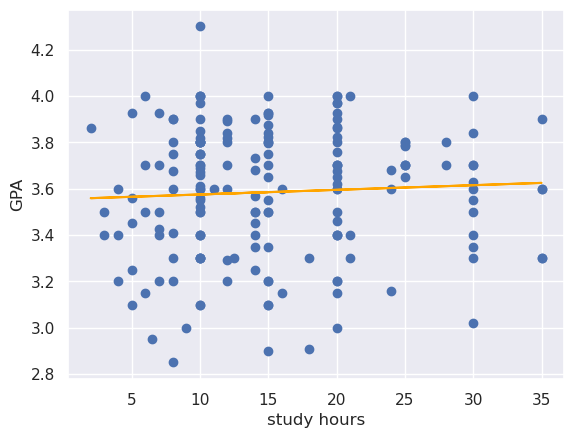

In [31]:
plt.scatter(x1,y)
ycap = 0.002*x1 + 3.5549
fig = plt.plot(x1,ycap,c='orange')
plt.xlabel('study hours')
plt.ylabel('GPA')
plt.show()